In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import csv
from scipy.stats import norm
from scipy import stats
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit
import time


In [2]:
qcd = pd.read_csv('qcd_outputDataForLearning.csv')
qcd['is_higgs'] = 0
hh = pd.read_csv('dihiggs_outputDataForLearning.csv')
hh['is_higgs'] = 1

In [3]:
print(len(qcd), "rows of qcd data")
qcd.head()

1703 rows of qcd data


,hh_mass,h1_mass,h2_mass,hh_pt,h1_pt,h2_pt,"deltaR(h1, h2)",deltaR(h1 jets),deltaR(h2 jets),"deltaPhi(h1, h2)",...,jet4_pz,jet1_energy,jet2_energy,jet3_energy,jet4_energy,jet1_btag,jet2_btag,jet3_btag,jet4_btag,is_higgs
0,389.560210,124.325608,111.570920,136.932891,171.988626,109.203811,2.559584,2.308070,1.890789,2.221530,...,-76.250394,220.464571,21.970768,88.955955,83.794049,1,1,1,1,0
1,647.207817,44.270179,50.027954,20.930002,157.928581,140.624963,4.146202,0.535946,0.671977,-3.062559,...,-108.175850,265.363449,158.046447,132.001760,119.019995,1,1,1,1,0
2,322.208428,26.864315,97.050753,38.709715,135.583186,144.740330,2.925384,0.500025,1.247225,-2.872296,...,-42.742465,137.378936,28.336301,93.615332,81.004145,1,1,1,1,0
3,419.258968,52.990523,68.470152,41.059689,164.301699,125.246712,3.489830,0.856370,1.418455,-3.053220,...,7.752531,293.246702,35.669705,129.070096,22.087586,1,1,1,1,0
4,500.859412,50.131320,102.613244,26.595028,185.256231,187.008176,3.293268,0.639606,1.084399,2.998898,...,26.027230,359.636926,109.941192,149.078860,68.032946,1,1,1,1,0


In [4]:
print(len(hh), "rows of dihiggs data")
hh.head()
#list(hh)

4605 rows of dihiggs data


,hh_mass,h1_mass,h2_mass,hh_pt,h1_pt,h2_pt,"deltaR(h1, h2)",deltaR(h1 jets),deltaR(h2 jets),"deltaPhi(h1, h2)",...,jet4_pz,jet1_energy,jet2_energy,jet3_energy,jet4_energy,jet1_btag,jet2_btag,jet3_btag,jet4_btag,is_higgs
0,357.863363,148.291836,158.296646,159.989384,146.375635,44.305395,2.173180,2.399412,3.045172,-1.399745,...,-193.100557,213.758220,33.357314,109.728774,199.436112,1,1,1,1,1
1,398.807335,96.553640,58.554601,79.057467,159.554932,127.973055,3.027527,1.343736,1.118390,-2.628797,...,26.364061,145.013069,49.268918,196.843044,36.066384,1,1,1,1,1
2,517.175766,110.271880,130.164227,345.167743,311.858661,195.516589,1.993485,0.697377,1.152385,-1.705208,...,120.680121,236.958103,93.822710,169.676742,166.284766,1,1,1,1,1
3,703.807212,179.640526,166.136193,218.966737,339.262375,272.492484,2.518050,2.053376,2.090557,-2.441515,...,-109.657444,927.030920,36.379140,362.014352,111.759012,1,1,1,1,1
4,258.159408,36.588619,25.013392,95.051098,138.921709,46.393858,3.514808,0.549648,0.997364,-2.869764,...,-71.691360,109.019537,36.042242,133.506407,74.563495,1,1,1,1,1


In [5]:
all_data = qcd.append(hh.sample(n=1703))

In [6]:
print(len(all_data), "rows of all data")
all_data.head()

3406 rows of all data


,hh_mass,h1_mass,h2_mass,hh_pt,h1_pt,h2_pt,"deltaR(h1, h2)",deltaR(h1 jets),deltaR(h2 jets),"deltaPhi(h1, h2)",...,jet4_pz,jet1_energy,jet2_energy,jet3_energy,jet4_energy,jet1_btag,jet2_btag,jet3_btag,jet4_btag,is_higgs
0,389.560210,124.325608,111.570920,136.932891,171.988626,109.203811,2.559584,2.308070,1.890789,2.221530,...,-76.250394,220.464571,21.970768,88.955955,83.794049,1,1,1,1,0
1,647.207817,44.270179,50.027954,20.930002,157.928581,140.624963,4.146202,0.535946,0.671977,-3.062559,...,-108.175850,265.363449,158.046447,132.001760,119.019995,1,1,1,1,0
2,322.208428,26.864315,97.050753,38.709715,135.583186,144.740330,2.925384,0.500025,1.247225,-2.872296,...,-42.742465,137.378936,28.336301,93.615332,81.004145,1,1,1,1,0
3,419.258968,52.990523,68.470152,41.059689,164.301699,125.246712,3.489830,0.856370,1.418455,-3.053220,...,7.752531,293.246702,35.669705,129.070096,22.087586,1,1,1,1,0
4,500.859412,50.131320,102.613244,26.595028,185.256231,187.008176,3.293268,0.639606,1.084399,2.998898,...,26.027230,359.636926,109.941192,149.078860,68.032946,1,1,1,1,0


In [7]:
list(all_data)

['hh_mass',
 'h1_mass',
 'h2_mass',
 'hh_pt',
 'h1_pt',
 'h2_pt',
 'deltaR(h1, h2)',
 'deltaR(h1 jets)',
 'deltaR(h2 jets)',
 'deltaPhi(h1, h2)',
 'deltaPhi(h1 jets)',
 'deltaPhi(h2 jets)',
 'met',
 'met_phi',
 'scalarHT',
 'nJets',
 'nBTags',
 'isMatchable',
 'jet1_pt',
 'jet2_pt',
 'jet3_pt',
 'jet4_pt',
 'jet1_eta',
 'jet2_eta',
 'jet3_eta',
 'jet4_eta',
 'jet1_phi',
 'jet2_phi',
 'jet3_phi',
 'jet4_phi',
 'jet1_mass',
 'jet2_mass',
 'jet3_mass',
 'jet4_mass',
 'jet1_px',
 'jet2_px',
 'jet3_px',
 'jet4_px',
 'jet1_py',
 'jet2_py',
 'jet3_py',
 'jet4_py',
 'jet1_pz',
 'jet2_pz',
 'jet3_pz',
 'jet4_pz',
 'jet1_energy',
 'jet2_energy',
 'jet3_energy',
 'jet4_energy',
 'jet1_btag',
 'jet2_btag',
 'jet3_btag',
 'jet4_btag',
 'is_higgs']

In [8]:
all_data['hh_mass'].corr(all_data['is_higgs'])

-0.1956449851594062

In [9]:
all_data['hh_mass'].corr(all_data['is_higgs'])
hh['hh_mass'].corr(hh['is_higgs'])

nan

In [10]:
hh_mass = all_data[['hh_mass', 'is_higgs']]

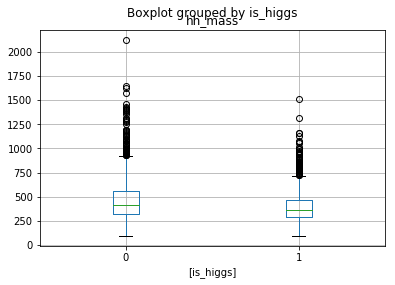

In [11]:
hh_massplot = hh_mass.boxplot(by='is_higgs')
# print("\n")
# h1_massplot = h1_mass.boxplot(by='is_higgs')

In [12]:
h1_mass = all_data[['h1_mass', 'is_higgs']]

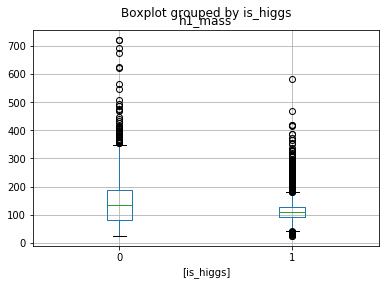

In [13]:
h1_massplot = h1_mass.boxplot(by='is_higgs')

In [14]:
h2_mass = all_data[['h2_mass', 'is_higgs']]

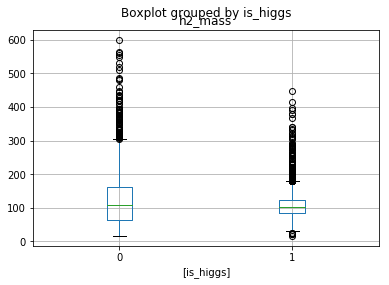

In [15]:
h2_massplot = h2_mass.boxplot(by='is_higgs')

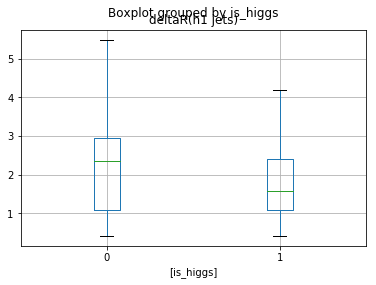

In [16]:
h1_deltar = all_data[['deltaR(h1 jets)', 'is_higgs']]
h1_deltarbox = h1_deltar.boxplot(by='is_higgs')

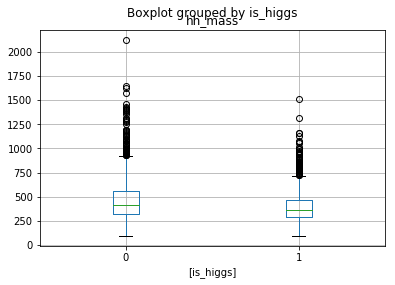

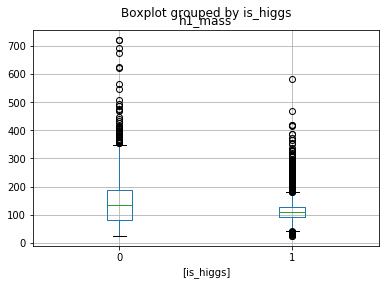

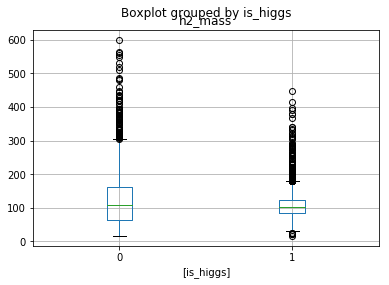

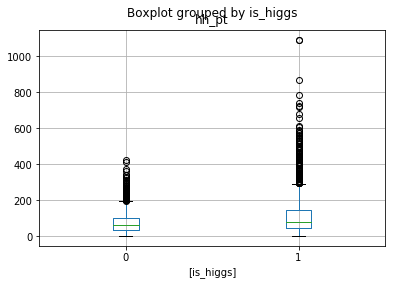

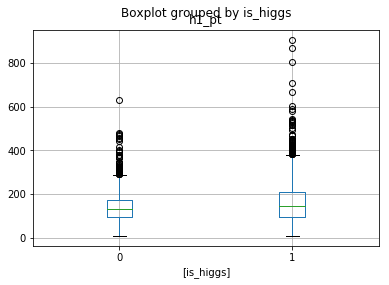

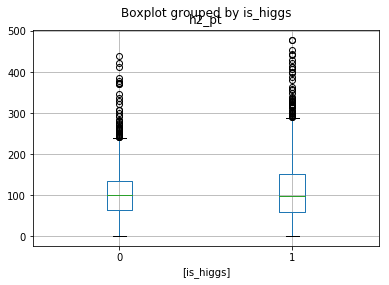

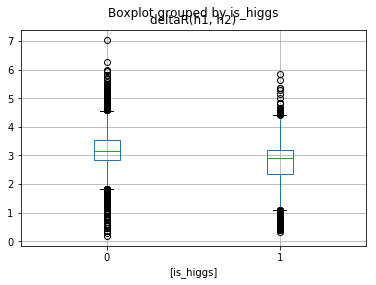

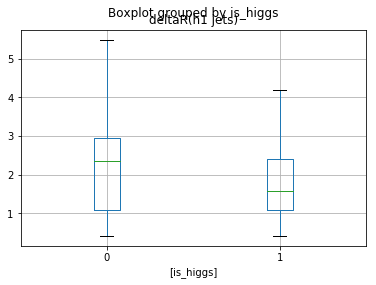

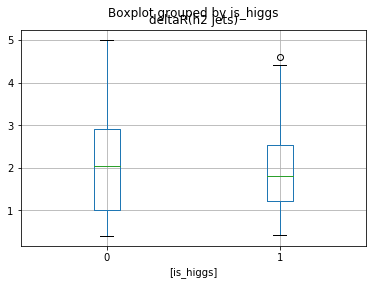

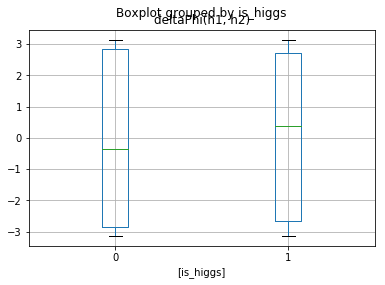

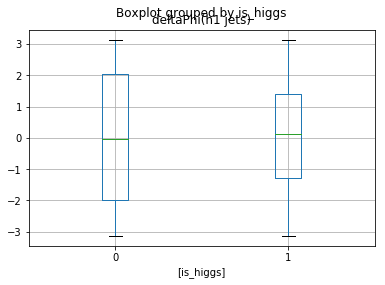

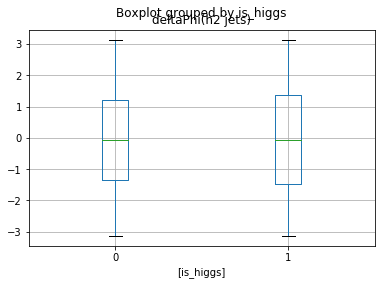

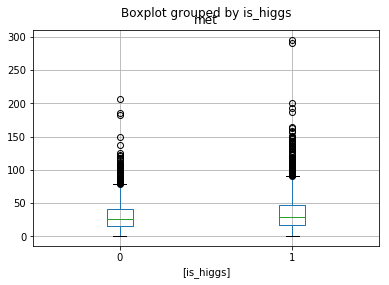

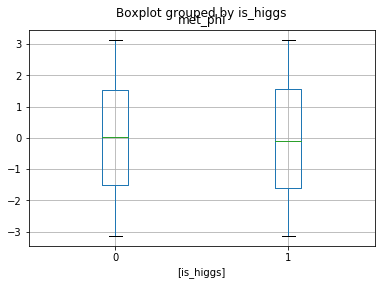

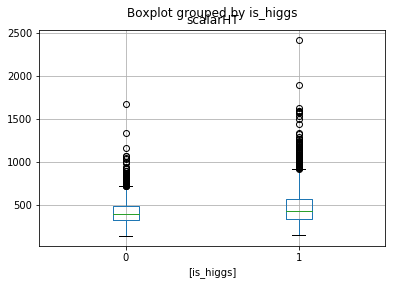

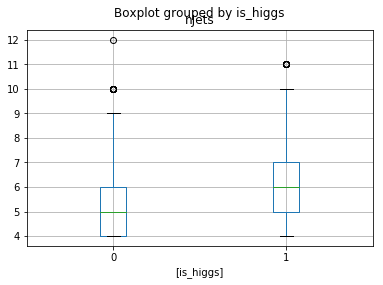

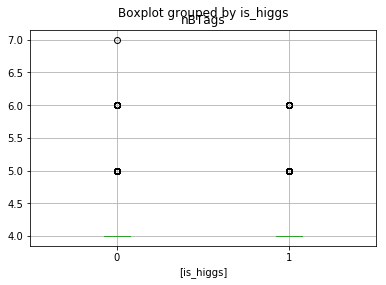

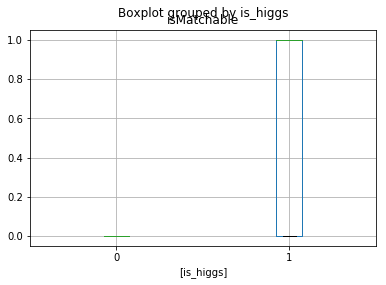

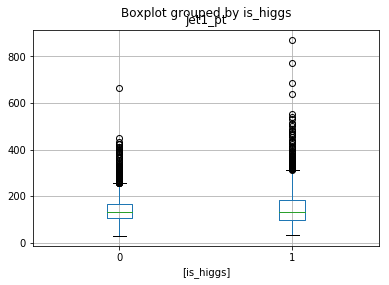

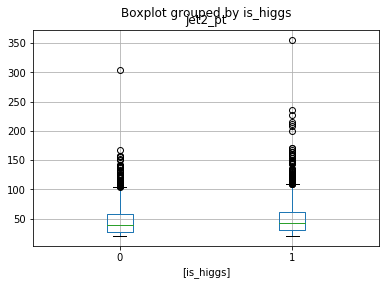

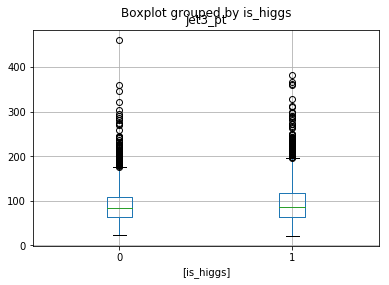

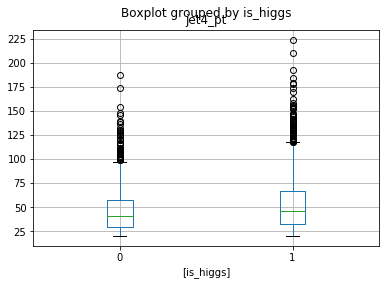

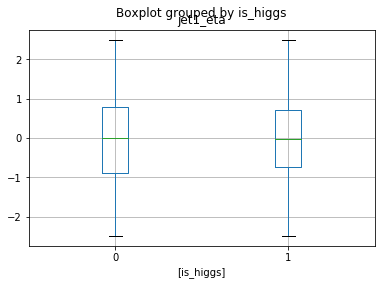

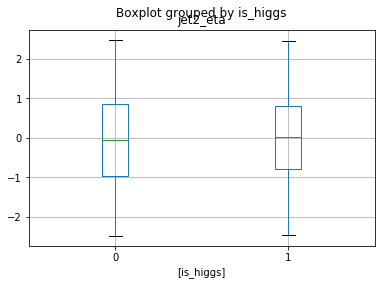

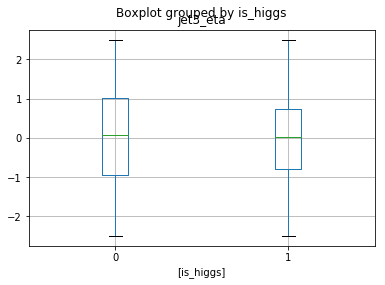

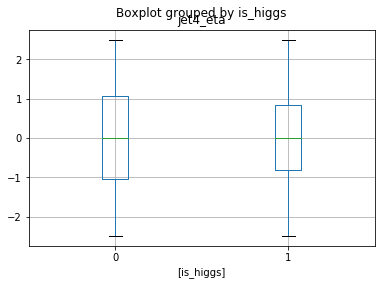

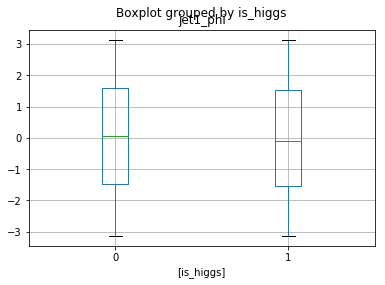

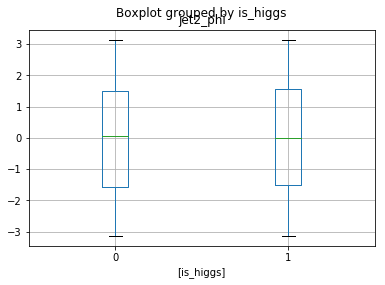

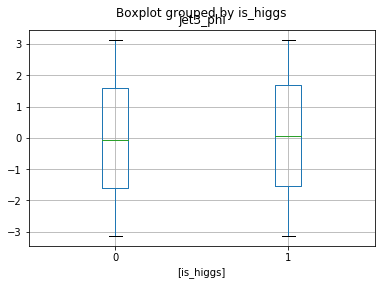

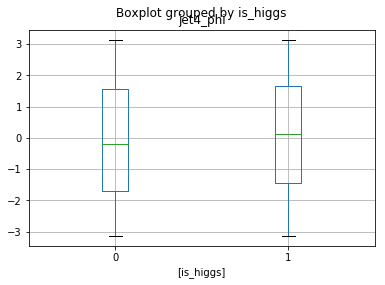

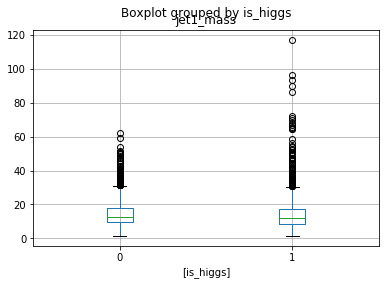

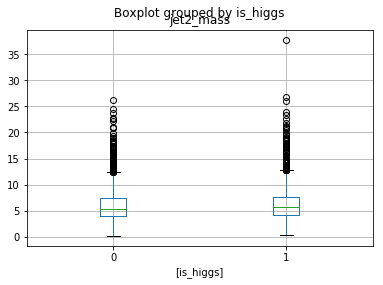

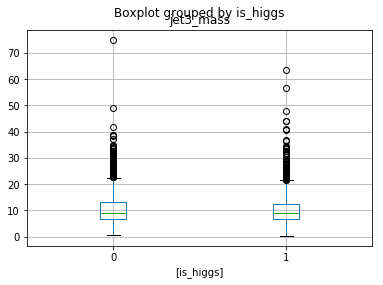

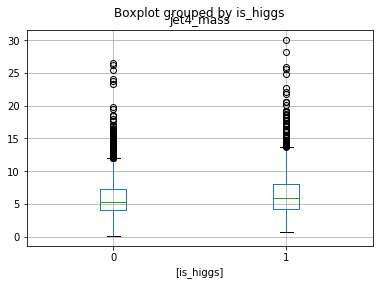

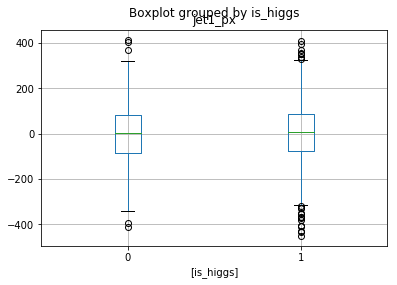

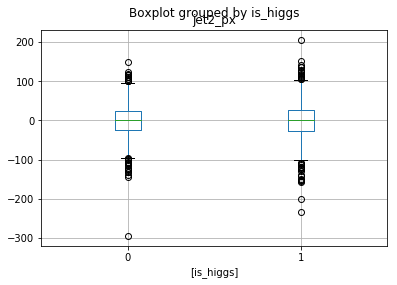

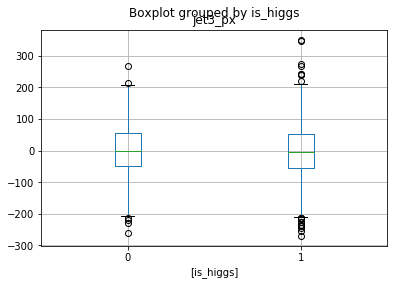

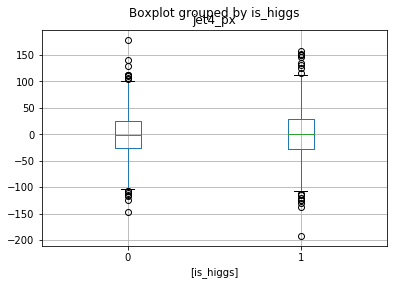

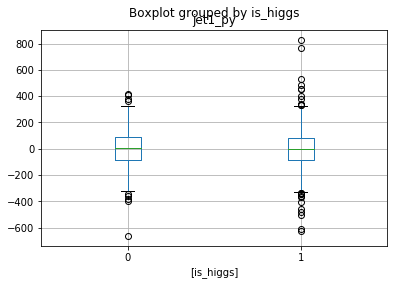

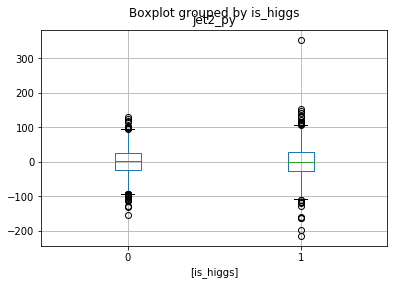

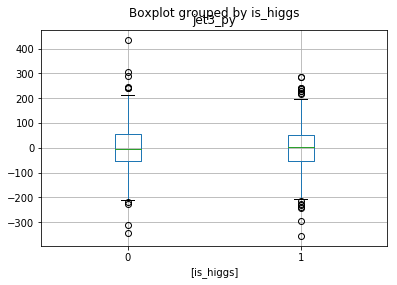

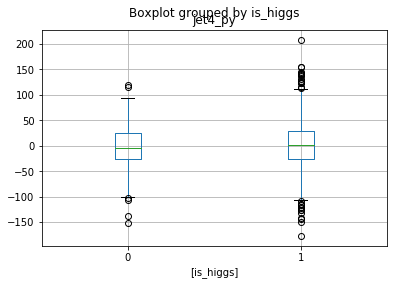

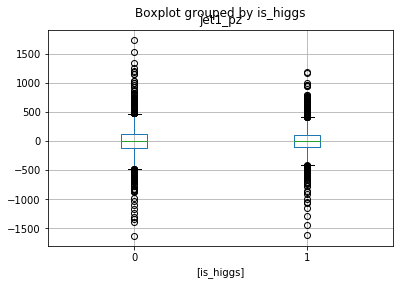

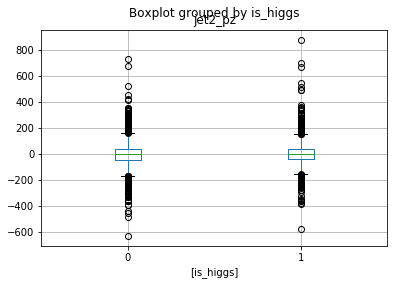

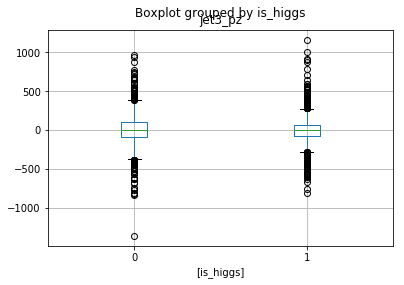

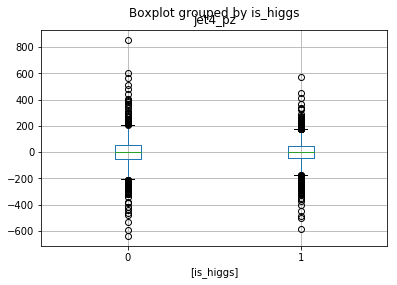

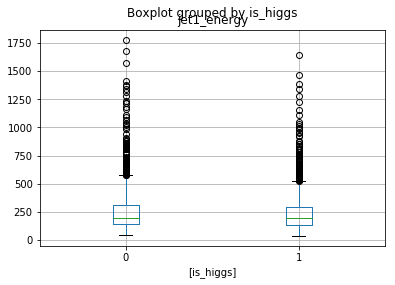

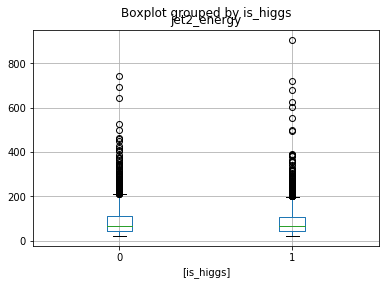

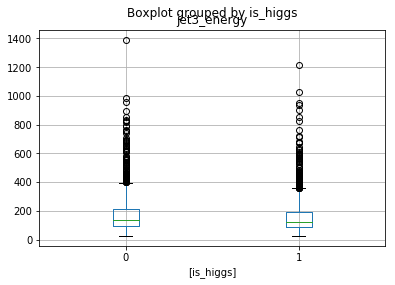

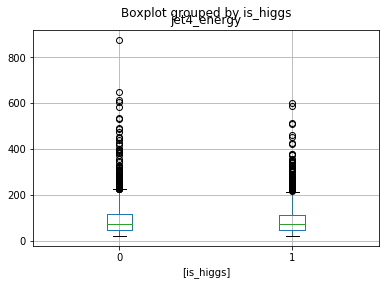

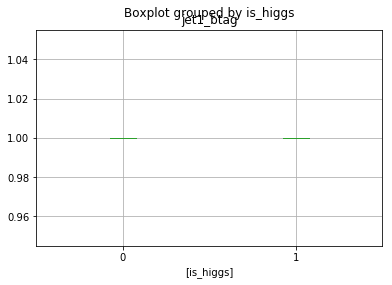

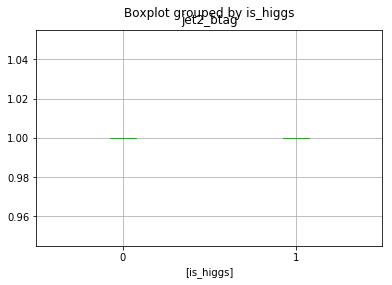

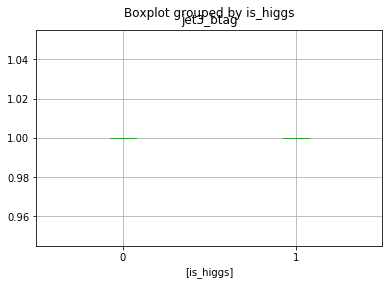

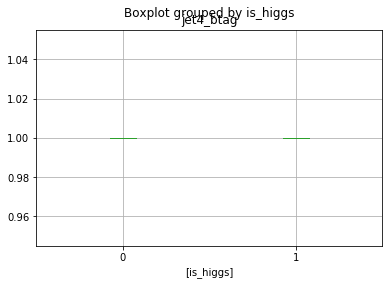

In [19]:
columns = list(all_data)

for i in columns:
    if(i=='is_higgs'):
        break
    else:
        data = all_data[[i, 'is_higgs']]
        plot = data.boxplot(by='is_higgs')
        fig = plot.get_figure()
        plt.show(block=False)
        time.sleep(.5)
        plt.close(fig)